In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [2]:
base_dir = "dataset_split/"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')
classes = ['gigi calculus','gigi caries','gigi discoloration','gigi gingivitis', 'gigi hypodontia', 'gigi sehat',
           'lidah fissure', 'lidah geografis','lidah kanker', 'lidah leukoplakia','lidah putih', 'lidah sehat']

In [3]:
train_counts = {}
val_counts = {}
test_counts = {}

for class_name in classes:
    train_path = os.path.join(train_dir, class_name)
    val_path = os.path.join(val_dir, class_name)
    test_path = os.path.join(test_dir, class_name)
    
    train_count = len(os.listdir(train_path))
    val_count = len(os.listdir(val_path))
    test_count = len(os.listdir(test_path))
    
    train_counts[class_name] = train_count
    val_counts[class_name] = val_count
    test_counts[class_name] = test_count

# Print the counts
for class_name, train_count in train_counts.items():
    print(f"Number of training images in {class_name}: {train_count}")

for class_name, val_count in val_counts.items():
    print(f"Number of validation images in {class_name}: {val_count}")
    
for class_name, test_count in val_counts.items():
    print(f"Number of testing images in {class_name}: {test_count}")

Number of training images in gigi calculus: 534
Number of training images in gigi caries: 459
Number of training images in gigi discoloration: 390
Number of training images in gigi gingivitis: 478
Number of training images in gigi hypodontia: 478
Number of training images in gigi sehat: 516
Number of training images in lidah fissure: 403
Number of training images in lidah geografis: 598
Number of training images in lidah kanker: 296
Number of training images in lidah leukoplakia: 237
Number of training images in lidah putih: 328
Number of training images in lidah sehat: 349
Number of validation images in gigi calculus: 152
Number of validation images in gigi caries: 131
Number of validation images in gigi discoloration: 111
Number of validation images in gigi gingivitis: 136
Number of validation images in gigi hypodontia: 136
Number of validation images in gigi sehat: 147
Number of validation images in lidah fissure: 115
Number of validation images in lidah geografis: 171
Number of val

In [4]:
calculus_train_path = os.path.join(train_dir, 'gigi calculus')
caries_train_path = os.path.join(train_dir, 'gigi caries')
discoloration_train_path = os.path.join(train_dir, 'gigi discoloration')
gingivitis_train_path = os.path.join(train_dir, 'gigi gingivitis')
hypodontia_train_path = os.path.join(train_dir, 'gigi hypodontia')
gsehat_train_path = os.path.join(train_dir, 'gigi sehat')
fissure_train_path = os.path.join(train_dir, 'lidah fissure')
geografis_train_path = os.path.join(train_dir, 'lidah geografis')
kanker_train_path = os.path.join(train_dir, 'lidah Kanker')
leukoplakia_train_path = os.path.join(train_dir, 'lidah leukoplakia')
putih_train_path = os.path.join(train_dir, 'lidah putih')
lsehat_train_path = os.path.join(train_dir, 'lidah sehat')

train_calculus_fnames = os.listdir(calculus_train_path)
train_caries_fnames = os.listdir(caries_train_path)
train_discoloration_fnames = os.listdir(discoloration_train_path)
train_gingivitis_fnames = os.listdir(gingivitis_train_path)
train_hypodontia_fnames = os.listdir(hypodontia_train_path)
train_gsehat_fnames = os.listdir(gsehat_train_path)
train_fissure_fnames = os.listdir(fissure_train_path)
train_geografis_fnames = os.listdir(geografis_train_path)
train_kanker_fnames = os.listdir(kanker_train_path)
train_leukoplakia_fnames = os.listdir(leukoplakia_train_path)
train_putih_fnames = os.listdir(putih_train_path)
train_lsehat_fnames = os.listdir(lsehat_train_path)

In [5]:
nrows = 10
ncols = 8

pic_index = 0

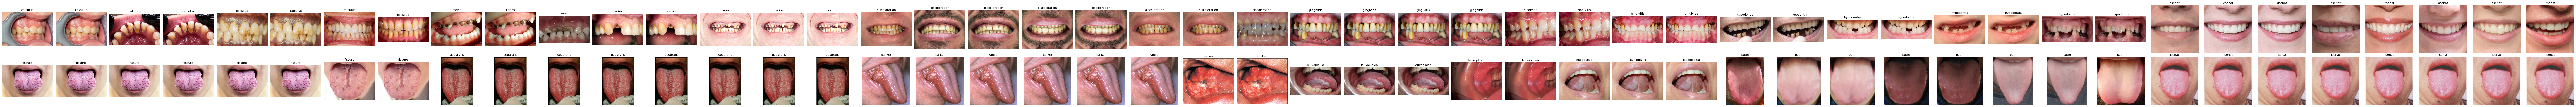

In [6]:
# Define the paths and fnames for each category
categories = [
    ("calculus", calculus_train_path, train_calculus_fnames),
    ("caries", caries_train_path, train_caries_fnames),
    ("discoloration", discoloration_train_path, train_discoloration_fnames),
    ("gingivitis", gingivitis_train_path, train_gingivitis_fnames),
    ("hypodontia", hypodontia_train_path, train_hypodontia_fnames),
    ("gsehat", gsehat_train_path, train_gsehat_fnames),
    ("fissure", fissure_train_path, train_fissure_fnames),
    ("geografis", geografis_train_path, train_geografis_fnames),
    ("kanker", kanker_train_path, train_kanker_fnames),
    ("leukoplakia", leukoplakia_train_path, train_leukoplakia_fnames),
    ("putih", putih_train_path, train_putih_fnames),
    ("lsehat", lsehat_train_path, train_lsehat_fnames)
]

pic_index += 8

# Create a single list containing image paths and corresponding labels for all categories
next_image_info = [(os.path.join(path, fname), category)
                   for category, path, fnames in categories
                   for fname in fnames[pic_index - 8:pic_index]]

num_images = len(next_image_info)
nrows = 2  # Adjust the number of rows and columns as needed
ncols = (num_images + nrows - 1) // nrows

plt.figure(figsize=(ncols * 3, nrows * 3))

for i, (img_path, label) in enumerate(next_image_info):
    plt.subplot(nrows, ncols, i + 1)
    plt.axis('off')

    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.title(label)  # Set the label as the title

plt.tight_layout()
plt.show()

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    rotation_range = 30,
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest',
)
validation_datagen = ImageDataGenerator(
    rescale = 1./255,
)



train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 24,
    class_mode = 'categorical',
    shuffle=True,
)

validation_generator = validation_datagen.flow_from_directory(
    val_dir,
    target_size = (150,150),
    batch_size = 24,
    class_mode = 'categorical',
    shuffle = False,
)



Found 4700 images belonging to 12 classes.
Found 1335 images belonging to 12 classes.


In [9]:
class_indices = train_generator.class_indices

# Print class indices
print("Class indices:", class_indices)

# Inverse mapping of class indices to class labels
class_labels = {v: k for k, v in class_indices.items()}
print("Class labels:", class_labels)


Class indices: {'gigi calculus': 0, 'gigi caries': 1, 'gigi discoloration': 2, 'gigi gingivitis': 3, 'gigi hypodontia': 4, 'gigi sehat': 5, 'lidah fissure': 6, 'lidah geografis': 7, 'lidah kanker': 8, 'lidah leukoplakia': 9, 'lidah putih': 10, 'lidah sehat': 11}
Class labels: {0: 'gigi calculus', 1: 'gigi caries', 2: 'gigi discoloration', 3: 'gigi gingivitis', 4: 'gigi hypodontia', 5: 'gigi sehat', 6: 'lidah fissure', 7: 'lidah geografis', 8: 'lidah kanker', 9: 'lidah leukoplakia', 10: 'lidah putih', 11: 'lidah sehat'}


In [10]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout

In [11]:
image_size=[150,150]
vgg=VGG19(input_shape=image_size+[3], weights='imagenet', include_top=False)
vgg.output

<KerasTensor: shape=(None, 4, 4, 512) dtype=float32 (created by layer 'block5_pool')>

In [12]:
x=Flatten()(vgg.output)
x=Dense(512, activation='relu')(x)
prediction=Dense(12,activation='softmax')(x)

In [13]:
model=Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              # optimizer='adam',
              metrics=['accuracy'])

In [15]:
samples = train_generator.samples

history = model.fit(
      train_generator,
      steps_per_epoch=samples // 24,
      epochs=20,
      validation_data=validation_generator,
      # validation_steps=10,
      verbose=1,
      # callbacks = [callbacks],
)

Epoch 1/20
 63/195 [========>.....................] - ETA: 1:01 - loss: 2.2909 - accuracy: 0.2374

C:\Users\Akram\miniconda3\envs\health\lib\site-packages\PIL\Image.py:970: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


195/195 [==============================] - 101s 432ms/step - loss: 1.6701 - accuracy: 0.4288 - val_loss: 0.9119 - val_accuracy: 0.6614
Epoch 2/20
195/195 [==============================] - 61s 314ms/step - loss: 0.8825 - accuracy: 0.6689 - val_loss: 0.6963 - val_accuracy: 0.7446
Epoch 3/20
195/195 [==============================] - 62s 315ms/step - loss: 0.7081 - accuracy: 0.7342 - val_loss: 0.6091 - val_accuracy: 0.7738
Epoch 4/20
195/195 [==============================] - 62s 314ms/step - loss: 0.6079 - accuracy: 0.7725 - val_loss: 0.5833 - val_accuracy: 0.7933
Epoch 5/20
195/195 [==============================] - 61s 314ms/step - loss: 0.5489 - accuracy: 0.7891 - val_loss: 0.5762 - val_accuracy: 0.7993
Epoch 6/20
195/195 [==============================] - 62s 316ms/step - loss: 0.4679 - accuracy: 0.8229 - val_loss: 0.4630 - val_accuracy: 0.8315
Epoch 7/20
195/195 [==============================] - 61s 313ms/step - loss: 0.4533 - accuracy: 0.8261 - val_loss: 0.4695 - val_accuracy: 0.

In [18]:
model.save('oral_VGG19.h5')

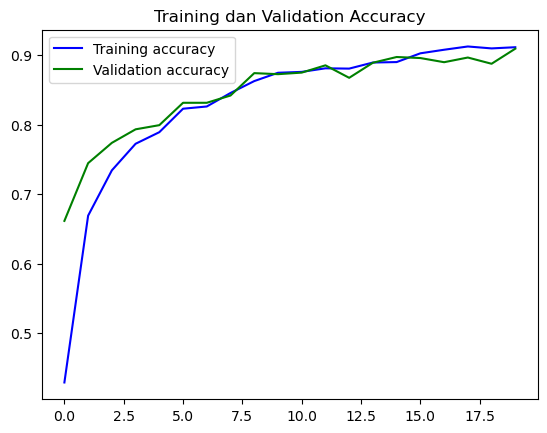

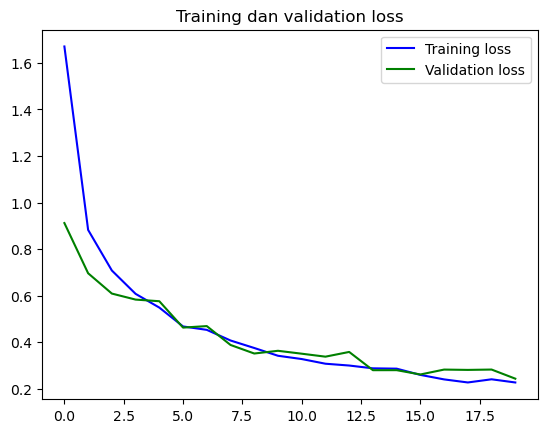

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'g', label='Validation accuracy')
plt.title('Training dan Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training dan validation loss')
plt.legend(loc=0)

plt.show()